In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
from sklearn.model_selection import cross_val_score






In [2]:
df = pd.read_csv('bankdata.csv')

In [3]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [5]:
# To check integrity
df.select_dtypes(include='number').sum().sum()

8078156

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
len(df[df.duplicated()])

0

In [9]:
def downcast_datatypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

In [10]:
df = downcast_datatypes(df)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int16
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int16
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int16
month        4521 non-null object
duration     4521 non-null int16
campaign     4521 non-null int16
pdays        4521 non-null int16
previous     4521 non-null int16
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int16(7), object(10)
memory usage: 415.1+ KB


In [12]:
# To check integrity
df.select_dtypes(include='number').sum().sum()

7947084

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C022630>,
      dtype=object)

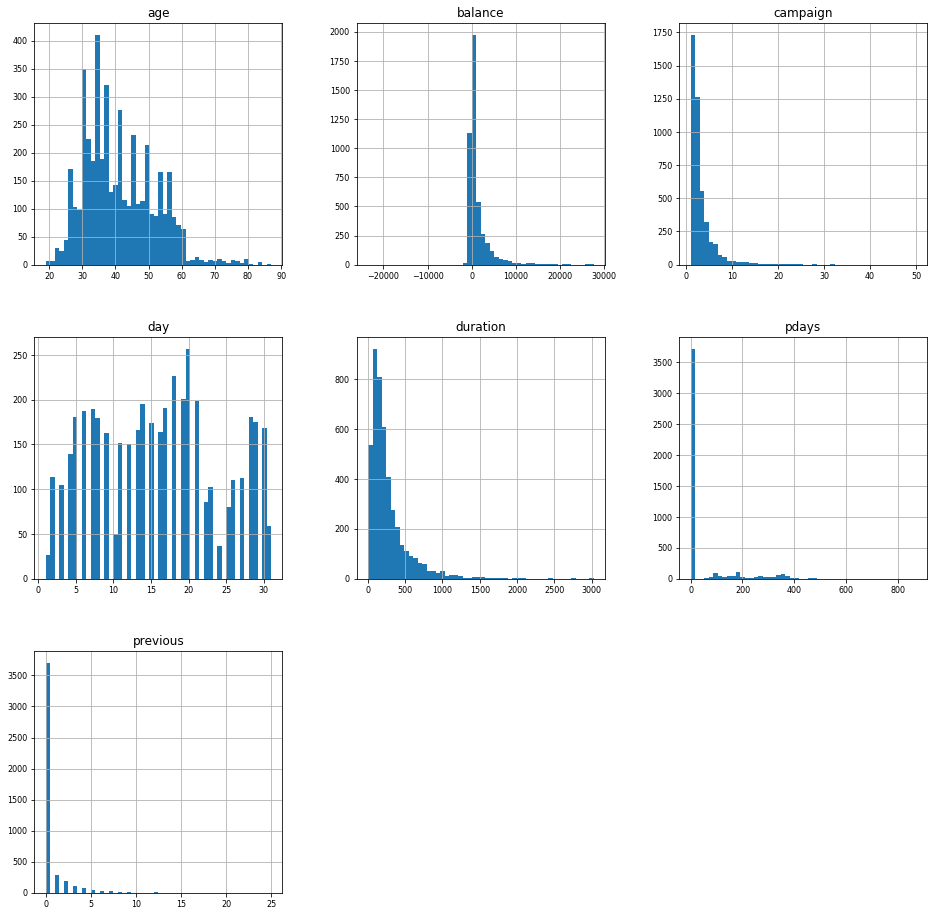

In [13]:
df.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8) 

In [14]:
df = df.drop(['day','poutcome'],axis=1)

In [15]:
def binaryType_(df):
    
    df.y.replace(('yes', 'no'), (1, 0), inplace=True)
    df.default.replace(('yes','no'),(1,0),inplace=True)
    df.housing.replace(('yes','no'),(1,0),inplace=True)
    df.loan.replace(('yes','no'),(1,0),inplace=True)
    #data.marital.replace(('married','single','divorced'),(1,2,3),inplace=True)
    df.contact.replace(('telephone','cellular','unknown'),(1,2,3),inplace=True)
    df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
    #data.education.replace(('primary','secondary','tertiary','unknown'),(1,2,3,4),inplace=True)
    
    return df

df = binaryType_(df)

In [16]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,y
0,30,unemployed,married,primary,0,1787,0,0,2,10,79,1,-1,0,0
1,33,services,married,secondary,0,4789,1,1,2,5,220,1,339,4,0
2,35,management,single,tertiary,0,1350,1,0,2,4,185,1,330,1,0
3,30,management,married,tertiary,0,1476,1,1,3,6,199,4,-1,0,0
4,59,blue-collar,married,secondary,0,0,1,0,3,5,226,1,-1,0,0


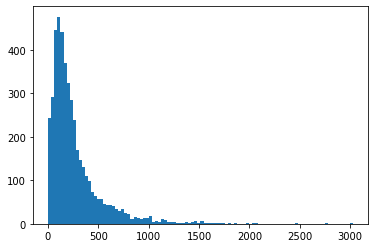

In [17]:
plt.hist((df.duration),bins=100)
plt.show()

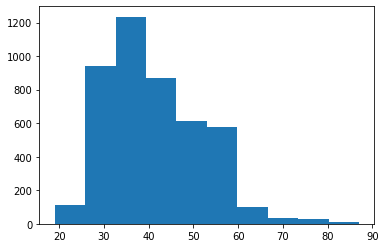

In [18]:
plt.hist(df.age,bins=10)
plt.show()

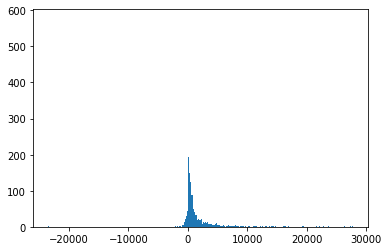

In [19]:
plt.hist(df.balance,bins=1000)
plt.show()

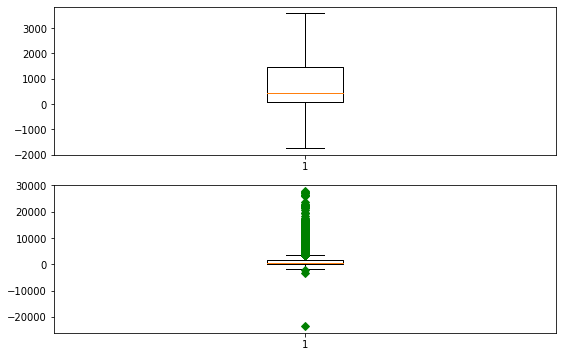

In [20]:
fig = plt.figure(1, figsize=(9, 6))
ax1 = fig.add_subplot(211)
bp1 = ax1.boxplot(df.balance,0,'')
ax2 = fig.add_subplot(212)
bp2 = ax2.boxplot(df.balance,0,'gD')
plt.show()

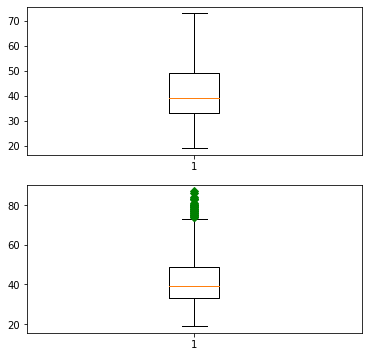

In [21]:
fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(211)
bp = ax.boxplot(df.age,0,'')
ax = fig.add_subplot(212)
bp = ax.boxplot(df.age,0,'gD')
plt.show()

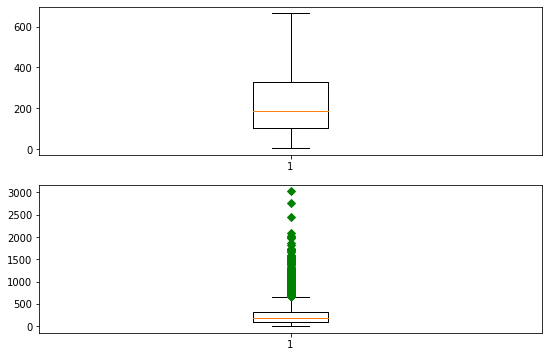

In [22]:
fig = plt.figure(1, figsize=(9, 6))
ax1 = fig.add_subplot(211)
bp1 = ax1.boxplot(df.duration,0,'')
ax2 = fig.add_subplot(212)
bp2 = ax2.boxplot(df.duration,0,'gD')
plt.show()

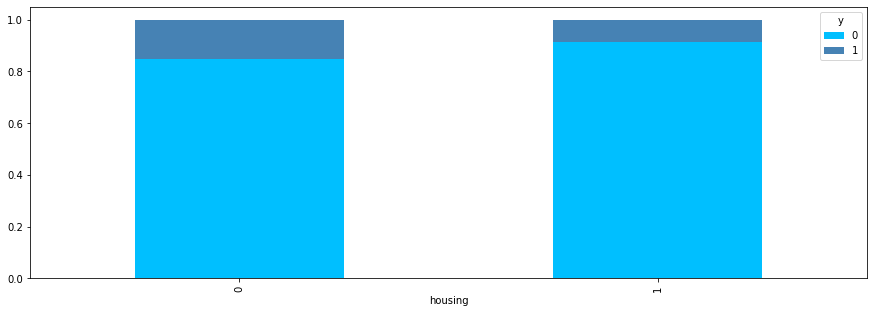

In [23]:
draw_data = pd.crosstab(df.housing, df.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

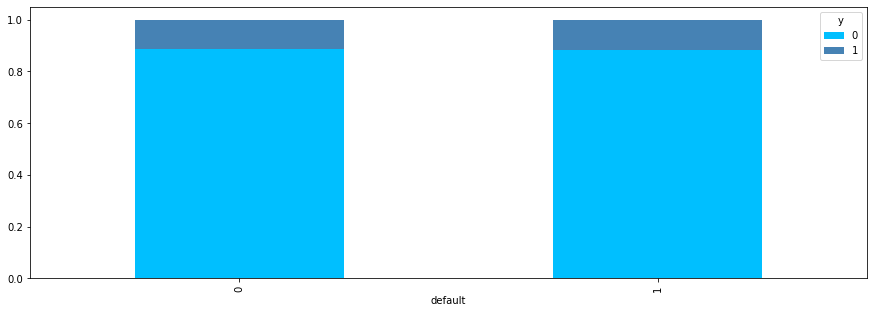

In [24]:
draw_data = pd.crosstab(df.default, df.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

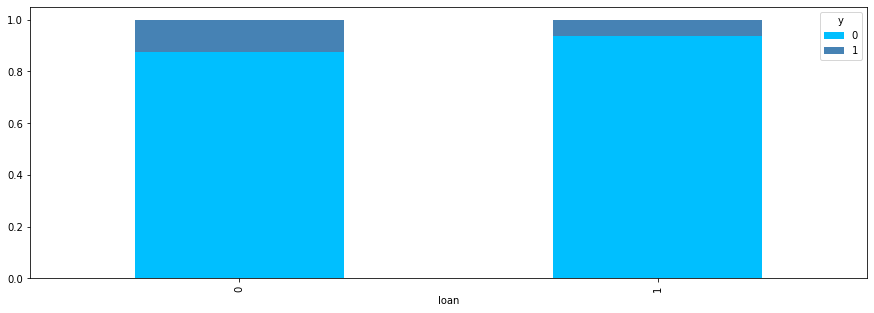

In [25]:
draw_data = pd.crosstab(df.loan, df.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

In [26]:
#data['duration'] = data['duration']/60
def age_(df):
    
    df['Adult'] = 0
    df['Middle_Aged'] = 0
    df['old'] = 0    
    df.loc[(df['age'] <= 35) & (df['age'] >= 18),'Adult'] = 1
    df.loc[(df['age'] <= 60) & (df['age'] >= 36),'Middle_Aged'] = 1
    #data.loc[(data['age'] <= 60) & (data['age'] >= 46),'Elderly'] = 1
    df.loc[df['age'] >=61,'old'] = 1
    
    return df

def campaign_(df):
    
    
    df.loc[df['campaign'] == 1,'campaign'] = 1
    df.loc[(df['campaign'] >= 2) & (df['campaign'] <= 3),'campaign'] = 2
    df.loc[df['campaign'] >= 4,'campaign'] = 3
    
    return df
def duration_(df):
    
    df['t_min'] = 0
    df['t_e_min'] = 0
    df['e_min']=0
    df.loc[df['duration'] <= 5,'t_min'] = 1
    df.loc[(df['duration'] > 5) & (df['duration'] <= 10),'t_e_min'] = 1
    df.loc[df['duration'] > 10,'e_min'] = 1
    
    return df

def pdays_(df):
    df['pdays_not_contacted'] = 0
    df['months_passed'] = 0
    df.loc[df['pdays'] == -1 ,'pdays_not_contacted'] = 1
    df['months_passed'] = df['pdays']/30
    df.loc[(df['months_passed'] >= 0) & (df['months_passed'] <=2) ,'months_passed'] = 1
    df.loc[(df['months_passed'] > 2) & (df['months_passed'] <=6),'months_passed'] = 2
    df.loc[df['months_passed'] > 6 ,'months_passed'] = 3
    
    return df

def previous_(df):
    
    df['Not_Contacted'] = 0
    df['Contacted'] = 0
    df.loc[df['previous'] == 0 ,'Not_Contacted'] = 1
    df.loc[(df['previous'] >= 1) & (df['pdays'] <=99) ,'Contacted'] = 1
    df.loc[df['previous'] >= 100,'Contacted'] = 2
    
    return df

def balance_(df):
    df['Neg_Balance'] = 0
    df['No_Balance'] = 0
    df['Pos_Balance'] = 0
    
    df.loc[~df['balance']<0,'Neg_Balance'] = 1
    df.loc[df['balance'] == 0,'No_Balance'] = 1
    df.loc[(df['balance'] >= 1) & (df['balance'] <= 100),'Pos_Balance'] = 1
    df.loc[(df['balance'] >= 101) & (df['balance'] <= 500),'Pos_Balance'] = 2
    df.loc[(df['balance'] >= 501) & (df['balance'] <= 2000),'Pos_Balance'] = 3
    df.loc[(df['balance'] >= 2001) & (df['balance'] <= 10000),'Pos_Balance'] = 4
    df.loc[df['balance'] >= 10001,'Pos_Balance'] = 5
    
    return df

def job_(df):
    
    df.loc[df['job'] == "management",'job'] = 1
    df.loc[df['job'] == "technician",'job'] = 2
    df.loc[df['job'] == "entrepreneur",'job'] = 3
    df.loc[df['job'] == "blue-collar",'job'] = 4
    df.loc[df['job'] == "retired",'job'] = 5
    df.loc[df['job'] == "admin.",'job'] = 6
    df.loc[df['job'] == "services",'job'] = 7
    df.loc[df['job'] == "self-employed",'job'] = 8
    df.loc[df['job'] == "unemployed",'job'] = 9
    df.loc[df['job'] == "student",'job'] = 10
    df.loc[df['job'] == "housemaid",'job'] = 11
    df.loc[df['job'] == "unknown",'job'] = 12
    
    return df

def marital_(df):
    
    df['married'] = 0
    df['singles'] = 0
    df['divorced'] = 0
    df.loc[df['marital'] == 'married','married'] = 1
    df.loc[df['marital'] == 'singles','singles'] = 1
    df.loc[df['marital'] == 'divorced','divorced'] = 1
    
    return df

def education_(df):
    
    df['primary'] = 0
    df['secondary'] = 0
    df['tertiary'] = 0
    df['unknown'] = 0
    df.loc[df['education'] == 'primary','primary'] = 1
    df.loc[df['education'] == 'secondary','secondary'] = 1
    df.loc[df['education'] == 'tertiary','tertiary'] = 1
    df.loc[df['education'] == 'unknown','unknown'] = 1    
    
    return df

df = campaign_(df)
df = age_(df)
df = education_(df)
df = balance_(df)
df = job_(df)
df = previous_(df)
df = duration_(df)
df = pdays_(df)
df = marital_(df)
print(df.columns)




Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'Adult', 'Middle_Aged', 'old', 'primary', 'secondary', 'tertiary',
       'unknown', 'Neg_Balance', 'No_Balance', 'Pos_Balance', 'Not_Contacted',
       'Contacted', 't_min', 't_e_min', 'e_min', 'pdays_not_contacted',
       'months_passed', 'married', 'singles', 'divorced'],
      dtype='object')


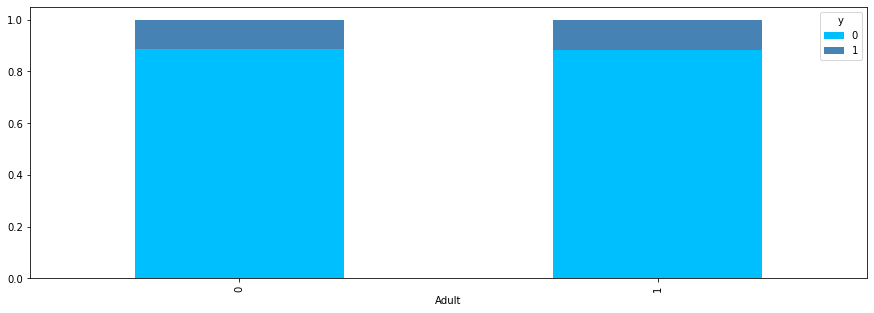

In [27]:
draw_data = pd.crosstab(df.Adult, df.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

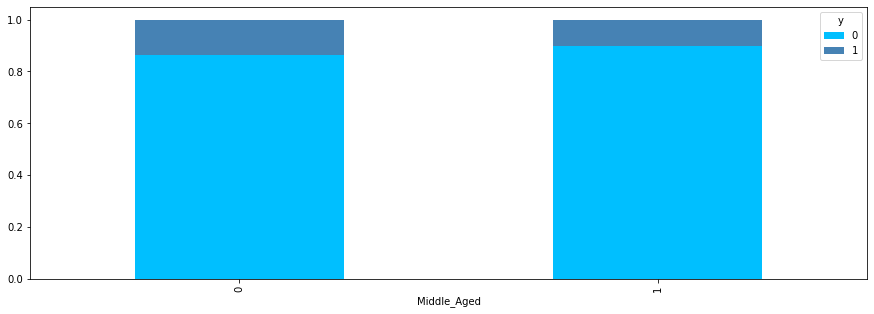

In [28]:
draw_data = pd.crosstab(df.Middle_Aged, df.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

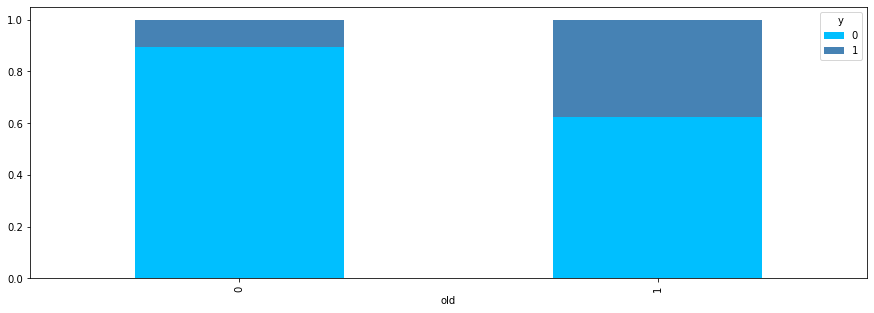

In [29]:
draw_data = pd.crosstab(df.old, df.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

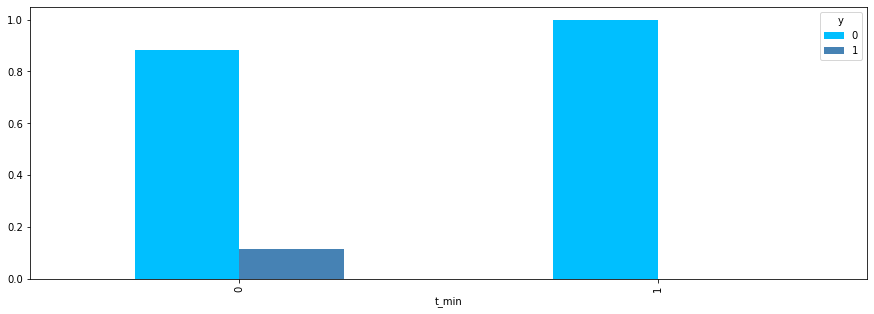

In [30]:
draw_data = pd.crosstab(df.t_min, df.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

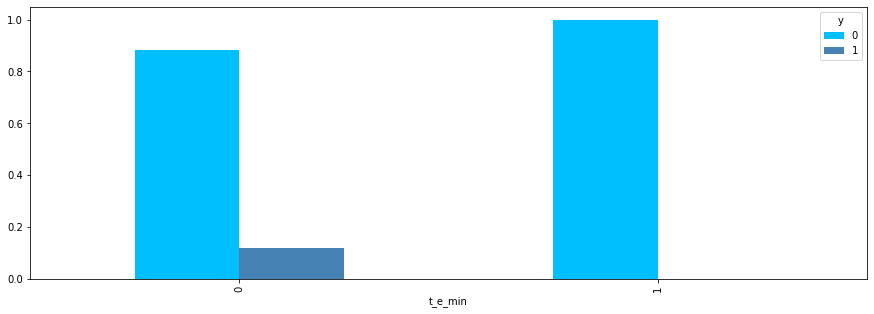

In [31]:

draw_data = pd.crosstab(df.t_e_min, df.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

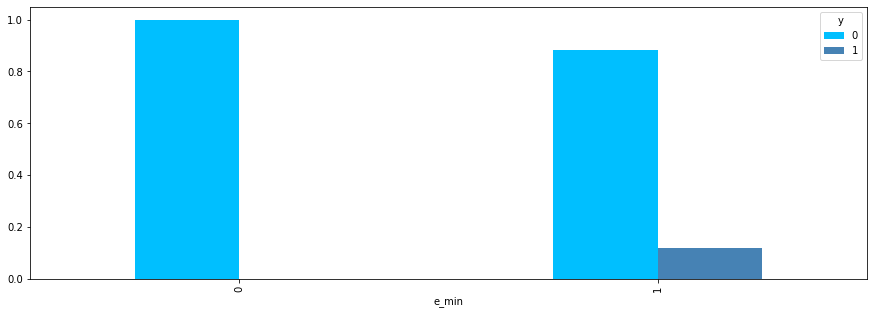

In [32]:
draw_data = pd.crosstab(df.e_min, df.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

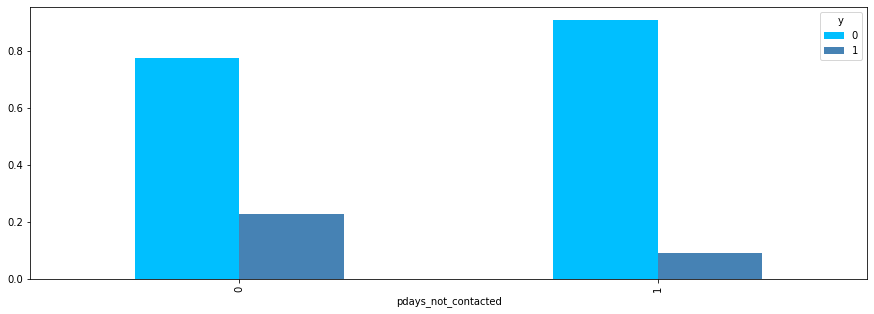

In [33]:
draw_data = pd.crosstab(df.pdays_not_contacted, df.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

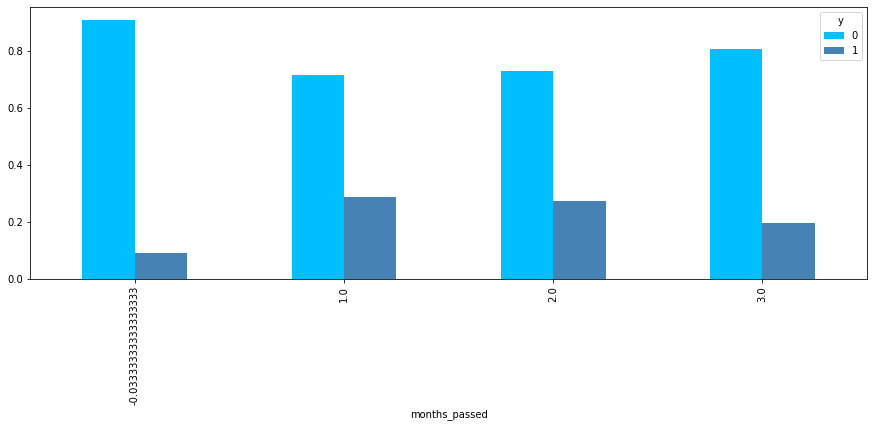

In [34]:
draw_data = pd.crosstab(df.months_passed, df.y)
draw_data.div(draw_data.sum(1).astype(int), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

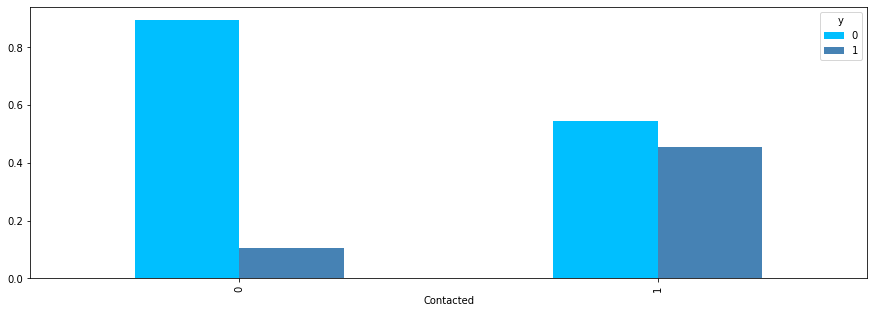

In [35]:
draw_data = pd.crosstab(df.Contacted, df.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

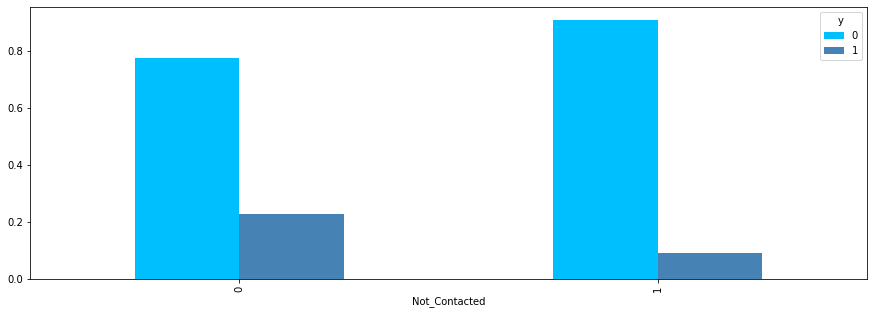

In [36]:
draw_data = pd.crosstab(df.Not_Contacted, df.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

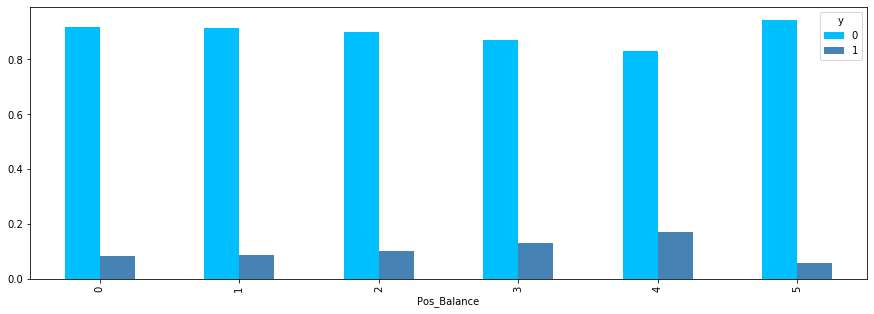

In [37]:
draw_data = pd.crosstab(df.Pos_Balance, df.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

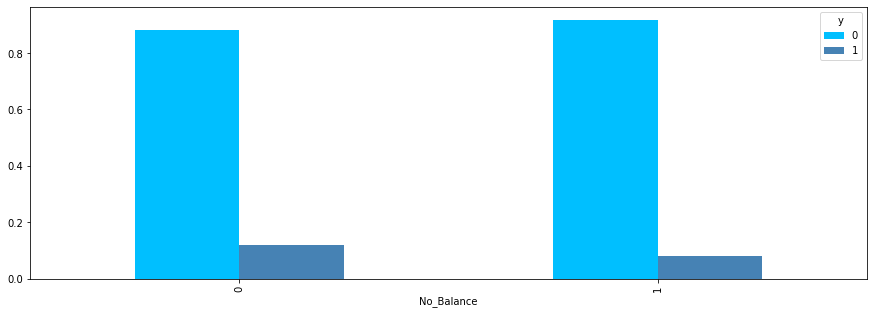

In [38]:
draw_data = pd.crosstab(df.No_Balance, df.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

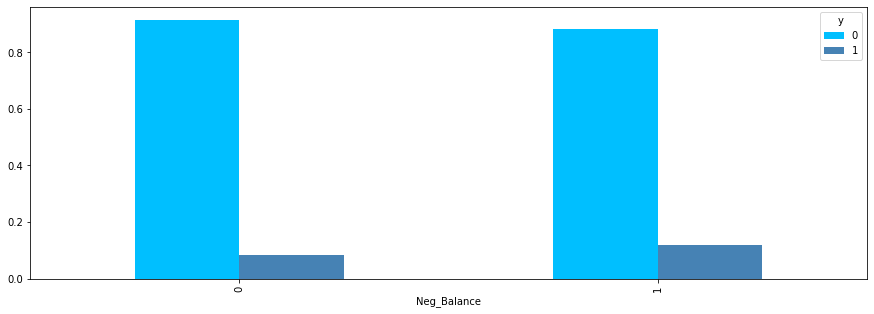

In [39]:
draw_data = pd.crosstab(df.Neg_Balance, df.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

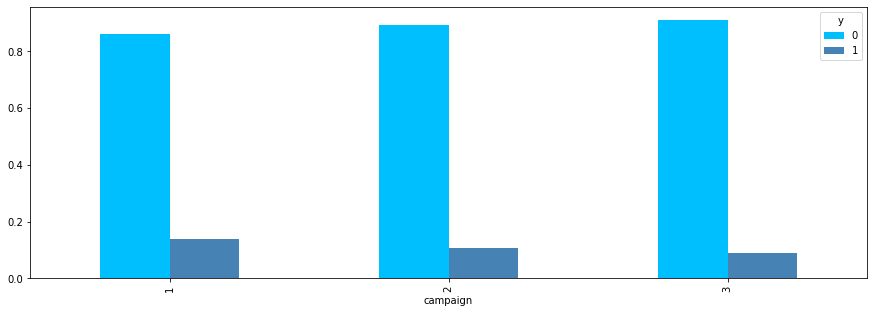

In [40]:
draw_data = pd.crosstab(df.campaign, df.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

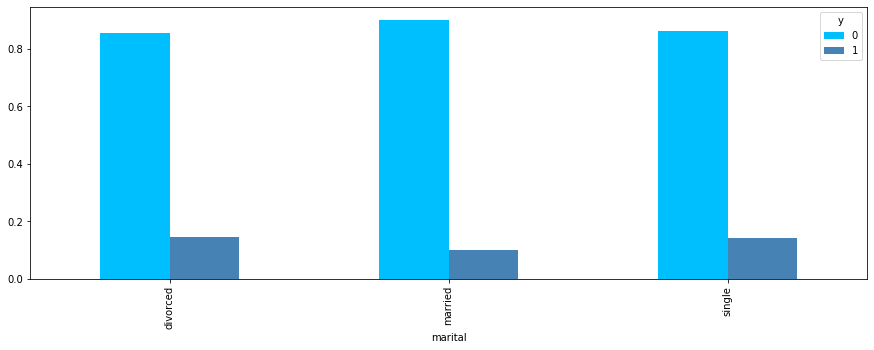

In [41]:
draw_data = pd.crosstab(df.marital, df.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

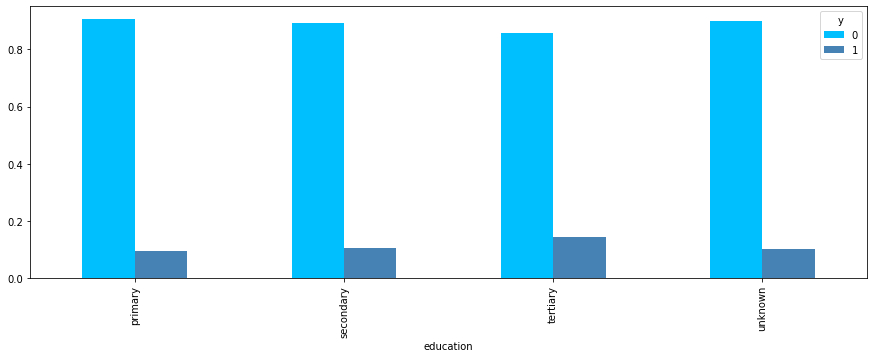

In [42]:
draw_data = pd.crosstab(df.education, df.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

In [43]:
# Build correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='PuBu')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,age,job,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,y,Adult,Middle_Aged,old,primary,secondary,tertiary,unknown,Neg_Balance,No_Balance,Pos_Balance,Not_Contacted,Contacted,t_min,t_e_min,e_min,pdays_not_contacted,months_passed,married,singles,divorced
age,1,0.0311979,-0.0178847,0.0809023,-0.193888,-0.0112497,-0.110989,0.0737639,-0.00236689,0.0109286,-0.00889353,-0.00351092,0.0450918,-0.739711,0.573704,0.459558,0.224938,-0.106872,-0.0940416,0.0811107,0.0403936,0.0103367,0.0780528,-0.0174142,0.0383823,-0.0127784,-0.0179145,0.0218477,-0.0174142,0.00897632,0.275139,nan,0.148043
job,0.0311979,1,-0.00327493,-0.0253761,-0.0556907,-0.00747768,0.00764649,-0.0587013,0.00738343,-0.0519049,-0.0127459,-0.000736324,0.00798093,0.00402857,-0.0231994,0.0568504,0.12384,0.210076,-0.360118,0.0782132,0.00295745,0.0143746,-0.0348357,0.00654896,0.0176712,-0.0114522,-0.0146149,0.0183046,0.00654896,-0.0103579,0.0120253,nan,-0.00180313
default,-0.0178847,-0.00327493,1,-0.0752411,0.00688065,0.0639939,0.0210821,0.00891679,-0.0116149,0.0043994,-0.0263166,-0.0266564,0.00130265,0.0115375,-0.0038537,-0.0222302,-0.00673421,0.0249013,-0.0214068,-0.00124033,-0.232025,0.00637126,-0.169205,0.0389974,-0.0228528,-0.00615651,-0.011715,0.0132572,0.0389974,-0.0343949,-0.0390311,nan,0.0488781
balance,0.0809023,-0.0253761,-0.0752411,1,-0.0423877,-0.072681,-0.0290004,0.0955223,-0.0148737,-0.00991885,0.0144372,0.0316447,0.0231064,-0.054199,0.0269382,0.0783086,-0.011883,-0.072127,0.078074,0.022943,0.190664,-0.146539,0.640839,-0.0414584,0.0310049,0.0153425,0.0120826,-0.017883,-0.0414584,0.0318759,0.0103683,nan,-0.0354238
housing,-0.193888,-0.0556907,0.00688065,-0.0423877,1,0.0184508,0.210574,-0.170922,0.0157405,-0.0365503,0.116893,0.0386206,-0.104683,0.0953907,-0.0393199,-0.161747,-0.000956348,0.111368,-0.0986239,-0.0512045,-0.0935839,-0.0530729,-0.0296432,-0.0628052,-0.091703,-0.00627225,0.0181927,-0.013176,-0.0628052,0.0828892,0.0384323,nan,-0.00119686
loan,-0.0112497,-0.00747768,0.0639939,-0.072681,0.0184508,1,-0.00261038,0.0392263,-0.00499714,0.0012525,-0.0310864,-0.0221148,-0.070517,0.0210683,0.00239882,-0.0684922,-0.0165745,0.0781386,-0.0434342,-0.0666212,-0.105576,-0.00356646,-0.0949497,0.041107,-0.0488627,0.00617039,-0.00347413,0.000188322,0.041107,-0.0379071,0.0322718,nan,0.0177983
contact,-0.110989,0.00764649,0.0210821,-0.0290004,0.210574,-0.00261038,1,-0.16579,0.00502723,-0.0301265,-0.21069,-0.17341,-0.125882,-0.00397975,0.0567179,-0.156093,0.0352434,0.0447935,-0.0865979,0.0233812,-0.0699583,-0.0247908,-0.0360458,0.255499,-0.10647,0.0147327,-0.0141021,0.00559271,0.255499,-0.246096,0.0148483,nan,0.0242213
month,0.0737639,-0.0587013,0.00891679,0.0955223,-0.170922,0.0392263,-0.16579,1,-0.000282014,0.0672872,-0.112003,-0.0374104,0.0233346,-0.0601696,0.0587729,0.00158699,-0.0307592,-0.0559271,0.0932552,-0.0187711,0.0354894,0.0470635,0.0558461,0.0740248,0.00803569,0.0145166,-0.00105065,-0.00586509,0.0740248,-0.0999235,0.0487395,nan,0.0112775
duration,-0.00236689,0.00738343,-0.0116149,-0.0148737,0.0157405,-0.00499714,0.00502723,-0.000282014,1,-0.0305073,0.0103802,0.0180803,0.401118,0.0251227,-0.0364789,0.034637,-0.00364027,0.0231791,-0.0177789,-0.0108022,-0.00111032,-0.0039148,0.0278081,-0.0152389,0.0154817,-0.046944,-0.0880865,0.0999885,-0.0152389,0.0160255,-0.0364357,nan,0.0213731
campaign,0.0109286,-0.0519049,0.0043994,-0.00991885,-0.0365503,0.0012525,-0.0301265,0.0672872,-0.0305073,1,-0.107415,-0.0800255,-0.06009,-0.029255,0.0452957,-0.0486619,0.0191719,-0.0186456,0.0215647,-0.0371282,0.00706543,0.0508456,-0.0439799,0.142085,-0.0955351,-0.00186814,0.0499368,-0.0433515,0.142085,-0.132952,0.03248,nan,-0.0239314


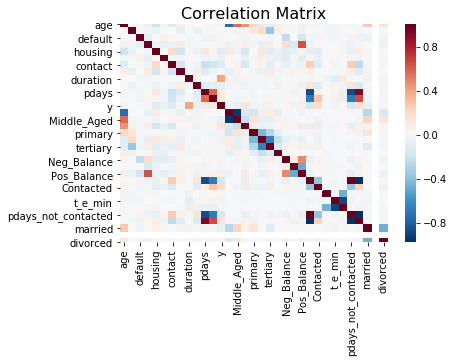

In [45]:
sns.heatmap(corr, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [51]:
print('The dataset has {0} rows and {1} columns'.format(df.shape[0], df.shape[1]))

The dataset has 4521 rows and 35 columns


In [44]:
from xgboost import XGBClassifier
classifiers = {
               'Adaptive Boosting Classifier':AdaBoostClassifier(),
               'Linear Discriminant Analysis':LinearDiscriminantAnalysis(),
               'Logistic Regression':LogisticRegression(),
               'Random Forest Classifier': RandomForestClassifier(),
               'K Nearest Neighbour':KNeighborsClassifier(8),
               'Decision Tree Classifier':DecisionTreeClassifier(),
               'Gaussian Naive Bayes Classifier':GaussianNB(),
               'Support Vector Classifier':SVC(),
               }

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
